# 特征缩放/归一化

In [2]:
# 例2-15 特征缩放实例
import pandas as pd
import sklearn.preprocessing as preproc

# 加载在线新闻流行度数据集
df = pd.read_csv('data/OnlineNewsPopularity.csv', delimiter=', ')

# 查看原始数据——文章中的单词数量
df['n_tokens_content'].values

C:\Users\waitp\AppData\Local\Temp\ipykernel_12976\3957633068.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('data/OnlineNewsPopularity.csv', delimiter=', ')


array([219., 255., 211., ..., 442., 682., 157.])

In [3]:
# min-max缩放
df['minmax'] = preproc.minmax_scale(df[['n_tokens_content']])
df['minmax'].values

array([0.02584376, 0.03009205, 0.02489969, ..., 0.05215955, 0.08048147,
       0.01852726])

In [4]:
# 标准化——注意根据标准化的定义，有些结果会是负的
df['standardized'] = preproc.StandardScaler().fit_transform(df[['n_tokens_content']])
df['standardized'].values

array([-0.69521045, -0.61879381, -0.71219192, ..., -0.2218518 ,
        0.28759248, -0.82681689])

In [5]:
# L2-归一化
df['l2_normalized'] = preproc.normalize(df[['n_tokens_content']], axis=0)
df['l2_normalized'].values

array([0.00152439, 0.00177498, 0.00146871, ..., 0.00307663, 0.0047472 ,
       0.00109283])

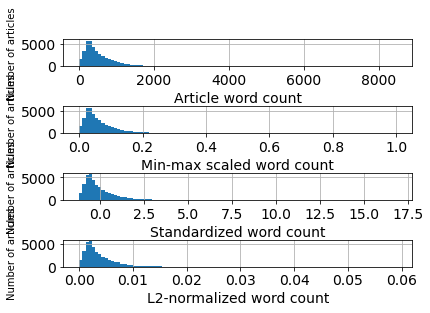

In [28]:
# 例2-16 绘制原始数据和缩放后数据的直方图
# 与对数变换不同，特征缩放不改变分布的形状，只有数据尺度发生了变化

import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=3)
# fig.tight_layout()  # 调整布局-应该放到最后
df['n_tokens_content'].hist(ax=ax1, bins=100)
ax1.tick_params(labelsize=14)
ax1.set_xlabel('Article word count', fontsize=14)
ax1.set_ylabel('Number of articles')

df['minmax'].hist(ax=ax2, bins=100)
ax2.tick_params(labelsize=14)
ax2.set_xlabel('Min-max scaled word count', fontsize=14)
ax2.set_ylabel('Number of articles')

df['standardized'].hist(ax=ax3, bins=100)
ax3.tick_params(labelsize=14)
ax3.set_xlabel('Standardized word count', fontsize=14)
ax3.set_ylabel('Number of articles')

df['l2_normalized'].hist(ax=ax4, bins=100)
ax4.tick_params(labelsize=14)
ax4.set_xlabel('L2-normalized word count', fontsize=14)
ax4.set_ylabel('Number of articles')

# fig.tight_layout()  # 调整布局
plt.tight_layout(h_pad=0.1)

# 特征交互